In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical

In [2]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/data_science/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/data_science/fashion-mnist_test.csv')

In [3]:
fashion_train_df.shape  

(60000, 785)

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
# convert to numpy arrays and reshape
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   # Normalizing the data
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    # Normalizing the data
y_test = testing[:, 0]

In [9]:
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)    # TODO : change the random state to 5

In [10]:
# Lets check the shape of all three datasets
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [14]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
94/94 [==============================] - 44s 447ms/step - loss: 0.7286 - accuracy: 0.7509 - val_loss: 0.4319 - val_accuracy: 0.8518
Epoch 2/50
94/94 [==============================] - 34s 357ms/step - loss: 0.4032 - accuracy: 0.8585 - val_loss: 0.3637 - val_accuracy: 0.8767
Epoch 3/50
94/94 [==============================] - 33s 346ms/step - loss: 0.3491 - accuracy: 0.8774 - val_loss: 0.3389 - val_accuracy: 0.8822
Epoch 4/50
94/94 [==============================] - 34s 360ms/step - loss: 0.3218 - accuracy: 0.8878 - val_loss: 0.3036 - val_accuracy: 0.8940
Epoch 5/50
94/94 [==============================] - 34s 366ms/step - loss: 0.2990 - accuracy: 0.8939 - val_loss: 0.3019 - val_accuracy: 0.8948
Epoch 6/50
94/94 [==============================] - 32s 345ms/step - loss: 0.2833 - accuracy: 0.8989 - val_loss: 0.2933 - val_accuracy: 0.8941
Epoch 7/50
94/94 [==============================] - 32s 344ms/step - loss: 0.2711 - accuracy: 0.9030 - val_loss: 0.2806 - val_accuracy: 0.9004

In [25]:

predict_x=cnn_model.predict(X_test) 
predict_x=np.argmax(predict_x,axis=1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

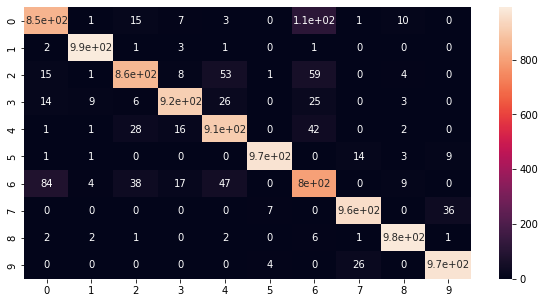

In [27]:
cm = confusion_matrix(y_test, predict_x)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

In [28]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, predict_x, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.88      0.85      0.86      1000
     class 1       0.98      0.99      0.99      1000
     class 2       0.91      0.86      0.88      1000
     class 3       0.95      0.92      0.93      1000
     class 4       0.87      0.91      0.89      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.76      0.80      0.78      1000
     class 7       0.96      0.96      0.96      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

